<a href="https://colab.research.google.com/github/Tejeswini-98/CLASS-NOTE-ML-ALGORITHMNS/blob/main/Claimants_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Necessary libraries

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [ ]:
claimants_data = pd.read_csv('claimants.csv')
claimants_data.head(30)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


## 3. Data Understanding

In [ ]:
claimants_data.shape

(1340, 7)

In [ ]:
claimants_data.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [ ]:
claimants_data.dtypes

CASENUM       int64
ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [ ]:
claimants_data.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


## 4. Data Preparation

In [ ]:
del claimants_data['CASENUM']

In [ ]:
claimants_data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
claimants_data.dropna(axis = 0,inplace=True)

In [ ]:
claimants_data.shape

(1096, 6)

In [ ]:
claimants_data.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [ ]:
claimants_data.dtypes

ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

## 5. Model Building

In [ ]:
X = claimants_data.drop(labels='ATTORNEY',axis=1)
y = claimants_data[['ATTORNEY']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=12,shuffle=True)

In [ ]:
X_train.shape,y_train.shape

((876, 5), (876, 1))

In [ ]:
X_train

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
965,0.0,1.0,0.0,49.0,4.714
448,0.0,1.0,0.0,64.0,3.457
802,1.0,1.0,0.0,11.0,3.713
567,1.0,0.0,0.0,40.0,8.406
602,1.0,1.0,0.0,13.0,0.150
...,...,...,...,...,...
513,1.0,1.0,0.0,64.0,0.061
580,1.0,1.0,0.0,8.0,6.047
59,0.0,1.0,0.0,10.0,0.987
334,0.0,1.0,0.0,8.0,5.830


In [ ]:
y_train

,ATTORNEY
965,1
448,0
802,0
567,1
602,1
...,...
513,1
580,0
59,1
334,0


### 6. Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
logistic_model.coef_

array([[ 0.35680679,  0.67570996, -0.57875527,  0.00657283, -0.39132083]])

In [ ]:
logistic_model.intercept_

array([-0.20995559])

### 7. Model Testing || 8. Model Evaluation

#### Training Data

In [ ]:
y_pred_train = dt_model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_train,y_pred_train))

0.9965753424657534


In [ ]:
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       464
           1       1.00      0.99      1.00       412

    accuracy                           1.00       876
   macro avg       1.00      1.00      1.00       876
weighted avg       1.00      1.00      1.00       876



In [ ]:
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))

Confusion Matrix:
 [[464   0]
 [  3 409]]


0.9963592233009708


Text(0, 0.5, 'True Positive Rate')

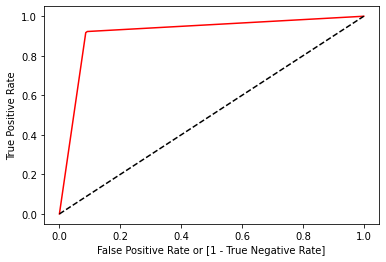

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y, dt_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

#### Test Data

In [ ]:
y_pred_test = logistic_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_test)

### 9. Model Deployement

In [ ]:
from pickle import dump

In [ ]:
dump(logistic_model,open('log_model.pkl','wb'))

In [ ]:
from pickle import load

In [ ]:
loaded_logistic_model = load(open('log_model.pkl','rb'))

In [ ]:
y_prediction_validation = loaded_logistic_model.predict(X_test)

# THE END!!